# Nutrition Model

### Importing modules

In [132]:
import pandas as pd
import os
from dotenv import load_dotenv
import numpy as np
from keras import models,layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Loading Data

In [133]:
load_dotenv()
FILE = os.environ.get('dataset_location')
FOOD_SET = pd.read_csv(FILE).fillna(0.0)

In [134]:
FOOD_SET.columns

Index(['id', 'name', 'servin_size', 'calories', 'total_fat', 'saturated_fat',
       'cholesterol', 'sodium', 'choline', 'folate', 'folic_acid', 'niacin',
       'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a',
       'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'iron', 'manesium', 'mananese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arinine', 'aspartic_acid', 'cystine', 'lutamic_acid', 'lycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'alactose', 'lucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatty_acids', 'monou

In [135]:
FOOD_SET.head()

,id,name,servin_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100,381,0.1,0.0,0,9.0,0.4,0.00 mc,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.00 mc,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eplant, raw",100,25,0.2,0.0,0,2.0,6.9,22.00 mc,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orane",100,144,2.0,1.2,1,46.0,7.7,4.00 mc,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


In [136]:
Filt_set = FOOD_SET[['calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'carbohydrate', 'fiber', 'sugars', 'calcium', 'iron', 'potassium']]
Filt_set.head()

,calories,total_fat,saturated_fat,cholesterol,sodium,carbohydrate,fiber,sugars,calcium,iron,potassium
0,381,0.1,0.0,0,9.0,91.27,0.9,0.00,2.0,0.47,3.0
1,691,72.0,6.2,0,0.0,13.86,9.6,3.97,70.0,2.53,410.0
2,25,0.2,0.0,0,2.0,5.88,3.0,3.53,9.0,0.23,229.0
3,367,2.4,0.4,0,12.0,73.13,8.0,1.84,180.0,7.63,427.0
4,144,2.0,1.2,1,46.0,30.40,1.3,24.32,54.0,0.14,96.0


In [137]:
xx = StandardScaler().fit_transform(Filt_set)
xx[0]

array([ 0.91088603, -0.66110042, -0.53415339, -0.32997286, -0.31661445,
        2.53617533, -0.26706239, -0.49250904, -0.35687383, -0.38436147,
       -0.70607273])

### Parameters

In [186]:
DETERMINANT = 2
Test_Train = 0.8
DAILY_VALUES = {'calories': 2000.0,
                'total_fat': 65.0,
                'saturated_fat': 20.0,
                'cholesterol':300.0,
                'sodium':2300.0,
                'carbohydrate':225.0,
                'fiber':30.0,
                'sugars':50.0,
                'calcium':20.0,
                'iron': 18.0,
                'potassium':4700.0}
np.set_printoptions(threshold=np.inf)

### Label Creation

In [187]:
yy = []
for current_facts in Filt_set.values:
    product_values = np.zeros(11,)

    for i,(daily,fact) in enumerate(zip(DAILY_VALUES.values(),current_facts)):
        percentage = (fact / daily)
        product_values[i]=(round(percentage,100))    
        product_unhealthy = np.sum(product_values > 0.2)
    yy.append(1 if product_unhealthy >= DETERMINANT else 0)
yy = np.array(yy)
print(np.sum(yy == 1))
print(np.sum(yy == 0))

6097
2692


### Model Compile

In [140]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(11,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [141]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Model Fit

In [142]:
Division = round(Test_Train * len(yy))

x_train, x_test, y_train, y_test = xx[:Division],xx[Division:],yy[:Division],yy[Division:]

In [143]:
history = model.fit(x_train,y_train,epochs=15,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/15
110/110 [==============================] - 1s 4ms/step - loss: 0.4729 - accuracy: 0.7694 - val_loss: 0.5216 - val_accuracy: 0.6251
Epoch 2/15
110/110 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8032 - val_loss: 0.4229 - val_accuracy: 0.7605
Epoch 3/15
110/110 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8389 - val_loss: 0.3685 - val_accuracy: 0.8527
Epoch 4/15
110/110 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8535 - val_loss: 0.3446 - val_accuracy: 0.8669
Epoch 5/15
110/110 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8606 - val_loss: 0.3350 - val_accuracy: 0.8601
Epoch 6/15
110/110 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.8704 - val_loss: 0.3424 - val_accuracy: 0.8430
Epoch 7/15
110/110 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8760 - val_loss: 0.3012 - val_accuracy: 0.8663
Epoch 

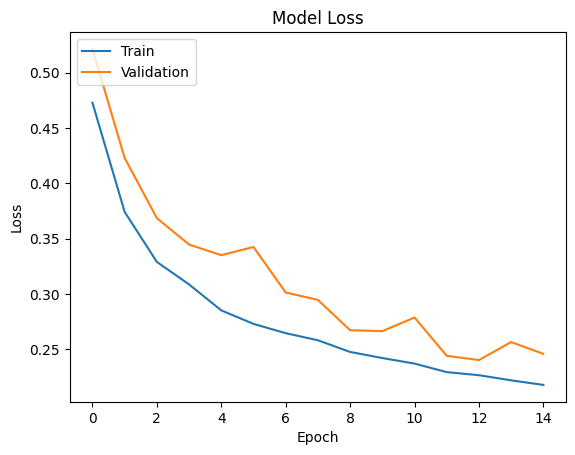

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

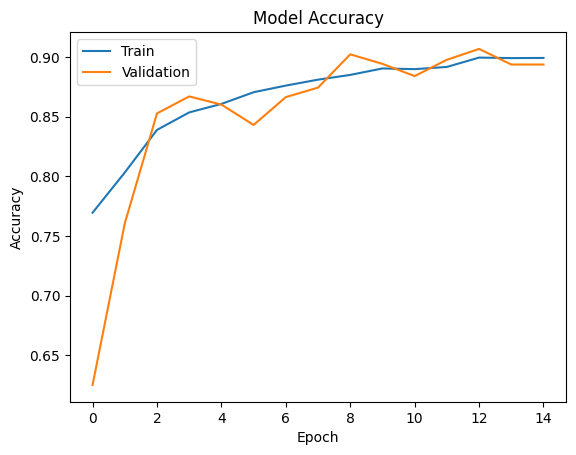

In [145]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()